# EDA - Análise de times e batalhas Pokémon com base em seus STATS

Dataset: [721 Pokémon Stats Dataset](https://www.kaggle.com/datasets/abcsds/pokemon)

Este projeto foi feito para fins de estudos relacionados a:
- Aperfeiçoamento da programação em Python
- Análise de Dados e plotagem de gráficos
- Aplicação de algoritimos de Machine Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# 1. Tratamento de dados

In [2]:
df = pd.read_csv('pokemon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [3]:
to_remove = ['Generation', 'Legendary']
df = df.drop(columns=to_remove)

In [4]:
df[df['id'] == 63]

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
62,63,NaN,Fighting,NaN,65,105,60,60,70,95


## 1.1. Remoção de valores nulos

In [5]:
df.loc[df['id'] == 63, 'Name'] = 'Primeape'
df[60:65]

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
60,61,Golduck,Water,NaN,80,82,78,95,80,85
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95


In [6]:
df['Type 2'].fillna('No_Type', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       800 non-null    int64 
 1   Name     800 non-null    object
 2   Type 1   800 non-null    object
 3   Type 2   800 non-null    object
 4   HP       800 non-null    int64 
 5   Attack   800 non-null    int64 
 6   Defense  800 non-null    int64 
 7   Sp. Atk  800 non-null    int64 
 8   Sp. Def  800 non-null    int64 
 9   Speed    800 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 62.6+ KB


C:\Users\felip\AppData\Local\Temp\ipykernel_25944\2760094619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna('No_Type', inplace=True)


# 2. Estudo dos dados

In [7]:
df['Total Stats'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
df['Avg. Stats'] = (df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']) / 6
df.head()

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Stats,Avg. Stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.500000
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.500000
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,104.166667
4,5,Charmander,Fire,No_Type,39,52,43,60,50,65,309,51.500000


In [8]:
def getPokemonTeam(pokemonList: list[str]) -> pd.DataFrame:
    return df[
        (df['Name'] == pokemonList[0]) |
        (df['Name'] == pokemonList[1]) |
        (df['Name'] == pokemonList[2]) |
        (df['Name'] == pokemonList[3]) |
        (df['Name'] == pokemonList[4]) |
        (df['Name'] == pokemonList[5]) 
    ]

Criação dos times

In [9]:
ash_kanto = getPokemonTeam(['Pikachu', 'Squirtle', 'Bulbasaur', 'Charizard', 'Kingler', 'Muk'])
ash_orange = getPokemonTeam(['Pikachu', 'Squirtle', 'Bulbasaur', 'Charizard', 'Lapras', 'Tauros'])
ash_johto = getPokemonTeam(['Pikachu', 'Totodile', 'Snorlax', 'Noctowl', 'Bayleef', 'Charizard'])
ash_hoenn = getPokemonTeam(['Pikachu', 'Grovyle', 'Swellow', 'Corphish', 'Torkoal', 'Glalie'])
ash_sinnoh = getPokemonTeam(['Pikachu', 'Torterra', 'Infernape', 'Gliscor', 'Staraptor', 'Gible'])
ash_unova = getPokemonTeam(['Pikachu', 'Oshawott', 'Pignite', 'Snivy', 'Krookodile', 'Boldore'])
ash_kalos = getPokemonTeam(['Pikachu', 'Talonflame', 'Greninja', 'Goodra', 'Hawlucha', 'Noivern'])

In [10]:
ash_kanto

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Stats,Avg. Stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.000000
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,534,89.000000
9,10,Squirtle,Water,No_Type,44,48,65,50,64,43,314,52.333333
30,31,Pikachu,Electric,No_Type,35,55,40,50,50,90,320,53.333333
96,97,Muk,Poison,No_Type,105,105,75,65,100,50,500,83.333333
107,108,Kingler,Water,No_Type,55,130,115,50,50,75,475,79.166667


In [11]:
ash_kalos

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Stats,Avg. Stats
30,31,Pikachu,Electric,No_Type,35,55,40,50,50,90,320,53.333333
726,727,Greninja,Water,Dark,72,95,67,103,71,122,530,88.333333
731,732,Talonflame,Fire,Flying,78,81,71,74,69,126,499,83.166667
771,772,Hawlucha,Fighting,Flying,78,92,75,74,63,118,500,83.333333
776,777,Goodra,Dragon,No_Type,90,100,70,110,150,80,600,100.000000
791,792,Noivern,Flying,Dragon,85,70,80,97,80,123,535,89.166667


In [12]:
import plotly.express as px

def showStatsRadar(team: pd.DataFrame, title):
    df = pd.DataFrame(dict(
    r=[team['HP'].sum(), team['Attack'].sum(), team['Defense'].sum(),
       team['Sp. Atk'].sum(), team['Sp. Def'].sum(), team['Speed'].sum()],
    theta=['HP','Attack','Defense',
           'Sp. Atk', 'Sp. Def', 'Speed']))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True, title=title)
    fig.update_traces(fill='toself')
    fig.show()

In [13]:
showStatsRadar(ash_kanto, title='Ash Kanto Team Stats')
showStatsRadar(ash_orange, title='Ash Orange Islands Team Stats')
showStatsRadar(ash_johto, title='Ash Johto Team Stats')
showStatsRadar(ash_hoenn, title='Ash Hoenn Team Stats')
showStatsRadar(ash_sinnoh, title='Ash Sinnoh Team Stats')
showStatsRadar(ash_unova, title='Ash Unova Team Stats')
showStatsRadar(ash_kalos, title='Ash Kalos Team Stats')

Podemos analisar com estes gráficos como o potencial dos times do Ash está distribuído ao longo das regiões.

De todos, podemos ver como os times utilizados na Liga Indigo e na Liga Laranja foram o mais equilibrados em termos de stats.

Em Kalos, Ash teve um time com menos HP e Defesa, o que justificaria muitas derrotas caso o anime levasse os stats muito a sério.

Em Unova tivemos um time com menos velocidade, defeda e Sp. Def, o que também justificaria muitas de suas derrotas.



Text(0, 0.5, 'Pokémon DEX ID')

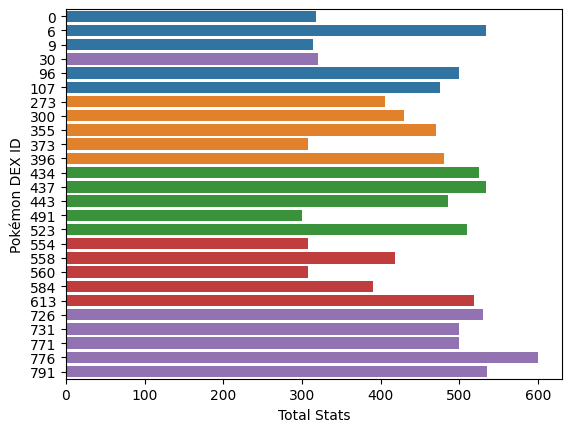

In [60]:
sn.barplot(data=ash_kanto['Total Stats'], orient='h')
sn.barplot(data=ash_hoenn['Total Stats'], orient='h')
sn.barplot(data=ash_sinnoh['Total Stats'], orient='h')
sn.barplot(data=ash_unova['Total Stats'], orient='h')
sn.barplot(data=ash_kalos['Total Stats'], orient='h')

plt.ylabel('Pokémon DEX ID')

No entanto, ao analisar a soma total dos stats de cada Pokémon em cada time do Ash, vemos que o time da região de Kalos é o mais forte comparado aos demais.

In [15]:
kanto_champ = getPokemonTeam(['Pidgeot', 'Alakazam', 'Rhydon', 'Exeggutor', 'Gyarados', 'Charizard'])
johto_champ = getPokemonTeam(['Dragonite', 'Altaria', 'Salamence', 'Garchomp', 'Gyarados', 'Charizard'])
hoenn_champ = getPokemonTeam(['Skarmory', 'Claydol', 'Aggron', 'Cradily', 'Armaldo', 'Metagross'])

In [16]:
import random as rnd

In [17]:
combats = pd.read_csv('combats.csv')
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50498 entries, 0 to 50497
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50498 non-null  int64
 1   Second_pokemon  50498 non-null  int64
 2   Winner          50498 non-null  int64
dtypes: int64(3)
memory usage: 1.2 MB


Unindo os dois datasets considerando a Dex Entry (ID) do Pokémon

In [18]:
combats = combats.merge(df, how='left', left_on='First_pokemon', right_on='id', suffixes=('', '_first'))

combats = combats.merge(df, left_on='Second_pokemon', right_on='id', how='left', suffixes=('_first', '_second'))

for feature in ['Total Stats', 'Avg. Stats', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    combats[f'{feature}_diff'] = combats[f'{feature}_first'] - combats[f'{feature}_second']

combats_pkmn = combats[[
    'First_pokemon', 'Second_pokemon', 'Winner', 'Type 1_first', 'Type 2_first', 'Type 1_second',
    'HP_diff', 'Attack_diff', 'Defense_diff', 'Sp. Atk_diff', 'Sp. Def_diff', 'Speed_diff',
                        'Type 2_second', 'Total Stats_diff', 'Avg. Stats_diff']]

combats_pkmn.head()

,First_pokemon,Second_pokemon,Winner,Type 1_first,Type 2_first,Type 1_second,HP_diff,Attack_diff,Defense_diff,Sp. Atk_diff,Sp. Def_diff,Speed_diff,Type 2_second,Total Stats_diff,Avg. Stats_diff
0,266,298,298,Rock,Ground,Grass,-20,-6,10,-15,10,-19,Dark,-40,-6.666667
1,702,701,701,Grass,Fighting,Rock,0,-39,-18,18,39,0,Fighting,0,0.000000
2,191,668,668,Fairy,Flying,Psychic,-20,-35,10,-45,10,0,No_Type,-80,-13.333333
3,237,683,683,Fire,No_Type,Dragon,-37,-80,-50,10,-50,-28,No_Type,-235,-39.166667
4,151,231,151,Rock,Water,Bug,50,50,-105,105,-160,50,Rock,-10,-1.666667


In [19]:
def getCombatPokemonTeam(pokemonList: list[str]) -> pd.DataFrame:
    return combats_pkmn[
        ((combats_pkmn['First_pokemon'] == pokemonList[0]) | (combats_pkmn['Second_pokemon'] == pokemonList[0])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[1]) | (combats_pkmn['Second_pokemon'] == pokemonList[1])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[2]) | (combats_pkmn['Second_pokemon'] == pokemonList[2])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[3]) | (combats_pkmn['Second_pokemon'] == pokemonList[3])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[4]) | (combats_pkmn['Second_pokemon'] == pokemonList[4])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[5]) | (combats_pkmn['Second_pokemon'] == pokemonList[5])) 
    ]

Buscando dentro do dataset mesclado quantas vezes os Pokémons dos times do Ash aparecem em batalhas em cada região analisada (conforme o [combats.csv](combats.csv))

In [20]:
ash_kanto_combat = getCombatPokemonTeam(ash_kanto.id.values)
ash_orange_combat = getCombatPokemonTeam(ash_orange.id.values)
ash_johto_combat = getCombatPokemonTeam(ash_johto.id.values)
ash_hoenn_combat = getCombatPokemonTeam(ash_hoenn.id.values)
ash_sinnoh_combat = getCombatPokemonTeam(ash_sinnoh.id.values)
ash_unova_combat = getCombatPokemonTeam(ash_unova.id.values)
ash_kalos_combat = getCombatPokemonTeam(ash_kalos.id.values)

In [21]:
print(len(ash_kanto_combat.values))
print(len(ash_johto_combat.values))
print(len(ash_hoenn_combat.values))
print(len(ash_sinnoh_combat.values))
print(len(ash_unova_combat.values))
print(len(ash_kalos_combat.values))

760
762
777
811
783
736


Podemos ver acima que, dos mais de 50000 registros:

- Em 760 deles, Pokémons do time do Ash em Kanto possuem registro de combate;
- Em 762 deles, Pokémons do time do Ash em Johto possuem registro de combate;
- Em 777 deles, Pokémons do time do Ash em Hoenn possuem registro de combate;
- Em 811 deles, Pokémons do time do Ash em Sinnoh possuem registro de combate;
- Em 783 deles, Pokémons do time do Ash em Unova possuem registro de combate;
- Em 736 deles, Pokémons do time do Ash em kalos possuem registro de combate

# 3. Treinamento do modelo e Análise dos resultados

In [22]:
def trainModel(n_estimators = 100, random_state = 42, test_size=0.2):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    from sklearn.preprocessing import StandardScaler

    X = combats[['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp. Atk_diff', 'Sp. Def_diff', 'Speed_diff', 'Total Stats_diff', 'Avg. Stats_diff']]
    y = combats['Winner']

    y = combats.apply(lambda row: 1 if row['Winner'] == row['First_pokemon'] else 0, axis=1)


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

    model = RandomForestClassifier(n_estimators = n_estimators, random_state = random_state)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy: float = accuracy_score(y_test, y_pred)
    precision: float = precision_score(y_test, y_pred, zero_division=1)
    recall: float = recall_score(y_test, y_pred, zero_division=1)
    f1: float = f1_score(y_test, y_pred, zero_division=1)
    roc_auc: float = roc_auc_score(y_test, y_pred)

    return accuracy, precision, recall, f1, roc_auc, scaler, model

In [23]:
accuracy, precision, recall, f1, roc_auc, scaler, model = trainModel()

print(f'Accuracy: {accuracy * 100}')
print(f'Precision: {precision * 100}')
print(f'Recall: {recall * 100}')
print(f'F1 Score: {f1 * 100}')
print(f'ROC AUC Score: {roc_auc * 100}')

Accuracy: 94.20792079207921
Precision: 92.97962477304822
Recall: 95.10936855138257
F1 Score: 94.03243904927064
ROC AUC Score: 94.24292180899926


In [24]:
print(ash_kanto.id.values)
print(ash_orange.id.values)
print(ash_johto.id.values)
print(ash_hoenn.id.values)
print(ash_sinnoh.id.values)
print(ash_unova.id.values)
print(ash_kalos.id.values)

[  1   7  10  31  97 108]
[  1   7  10  31 139 143]
[  7  31 156 168 173 179]
[ 31 274 301 356 374 397]
[ 31 435 438 444 492 524]
[ 31 555 559 561 585 614]
[ 31 727 732 772 777 792]


A função `randomizeTeams` funciona de forma que aleatoriza ambas as listas passadas a ele (uma com o time do Ash e outra com o time oponente) de forma a garantir que haja um "combate" entre cada um deles.

Exemplo: lista1 = [a,b,c], lista2 = [d,e,f]

O objetivo é fazer com que haja:

a vs d
a vs e
a vs f
b vs d
b vs e
b vs f
c vs d
c vs e
c vs f

Após o resultado da predição do modelo treinado, é verificado qual treinador (Ash ou oponente) possui mais Pokémons vitoriosos para decidir o vencedor.

In [25]:
def randomizeTeams(ash_team: np.ndarray, opponent_team: np.ndarray, opponent_name:str=str()) -> list:
    
    ## Shuffling trainer Pokémon party to randomize all battle possibilities
    rnd.shuffle(ash_team)
    rnd.shuffle(opponent_team)

    battle = pd.DataFrame({'Ash Team': ash_team, 'Opponent Team': opponent_team})
    
    battle = battle.merge(df, how='left', left_on='Ash Team', right_on='id', suffixes=('', '_first'))

    battle = battle.merge(df, left_on='Opponent Team', right_on='id', how='left', suffixes=('_first', '_second'))

    for feature in ['Total Stats', 'Avg. Stats', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
        battle[f'{feature}_diff'] = battle[f'{feature}_first'] - battle[f'{feature}_second']
    
    X_test_final = scaler.transform(battle[[
        'HP_diff', 'Attack_diff', 'Defense_diff', 'Sp. Atk_diff', 'Sp. Def_diff', 'Speed_diff',
        'Total Stats_diff', 'Avg. Stats_diff'
        ]])

    battle['Prediction'] = model.predict(X_test_final)

    battle['Winning_Pokemon'] = battle.apply(lambda row: row['Ash Team'] if row['Prediction'] == 1 else row['Opponent Team'], axis=1)

    set_ash = set(battle['Ash Team'].values)
    set_opponent = set(battle['Opponent Team'].values)
    set_winning = set(battle['Winning_Pokemon'].values)


    winner = 'Ash' if len(set_ash.intersection(set_winning)) > len(set_opponent.intersection(set_winning)) else opponent_name

    return [battle[['Ash Team', 'Opponent Team', 'Winning_Pokemon']], winner]

In [26]:
df_res, winner = randomizeTeams(
    ash_team=ash_kanto.id.values,
    opponent_team=[18, 65, 112, 103, 130, 6],
    opponent_name='Blue',
    )
print(winner)

Blue


A função `trainersBattle` executa a função `randomizeTeams` *'times' vezes* e adiciona o(s) vencedore(s) da rodada à uma lista.

Isso permite analisar as possibilidade de vitória de um treinador em um cenário de muitos testes. O número padrão de testes escolhido para esse projeto foi de **1000**.

In [27]:
def trainersBattle(ash_team,
                   opponent_team,
                   times=1000,
                   title:str=str(),
                   opponent_name:str=str()
                   ):
    winners = []

    for _ in range(0, times):
        _, winner = randomizeTeams(ash_team=ash_team, opponent_team=opponent_team, opponent_name=opponent_name)
        winners.append(winner)

    plt.title(title)
    plt.ylabel('Wins')
    sn.histplot(data=winners)

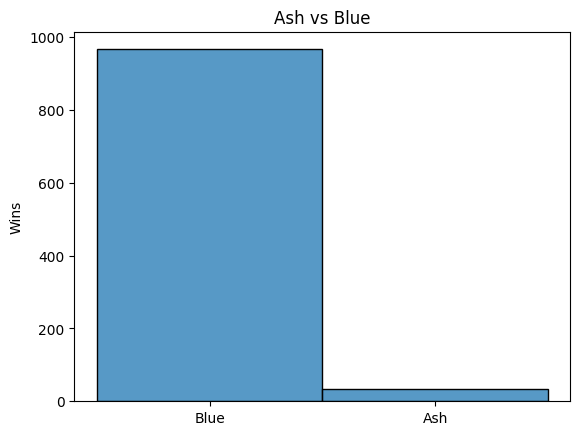

In [28]:
trainersBattle(
    ash_team=ash_kanto.id.values,
    opponent_team=[18, 65, 112, 103, 130, 6],
    title='Ash vs Blue',
    opponent_name='Blue')

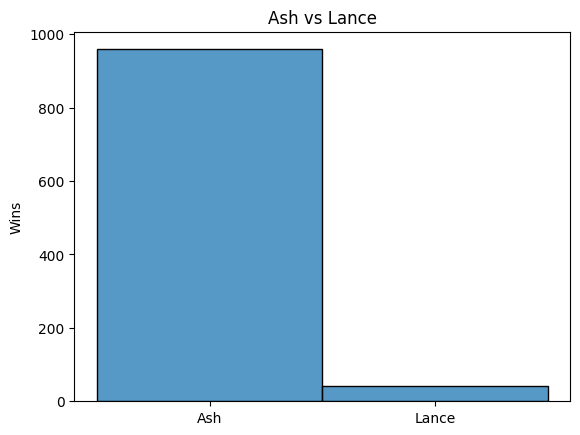

In [29]:
trainersBattle(
    ash_team=ash_orange.id.values,
    opponent_team=[130, 149, 149, 149, 142, 6],
    title='Ash vs Lance',
    opponent_name='Lance')

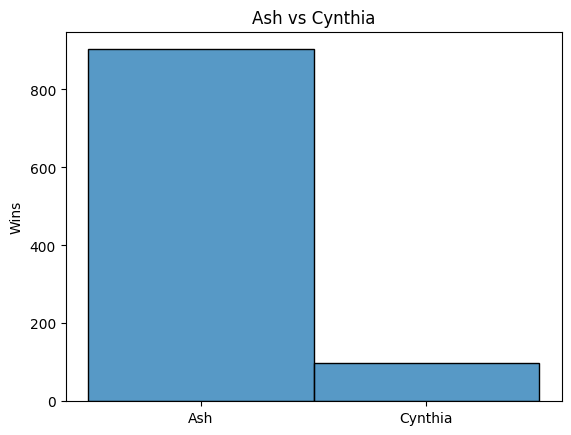

In [30]:
trainersBattle(
    ash_team=ash_sinnoh.id.values,
    opponent_team=[442, 407, 350, 448, 468, 445],
    title='Ash vs Cynthia',
    opponent_name='Cynthia')

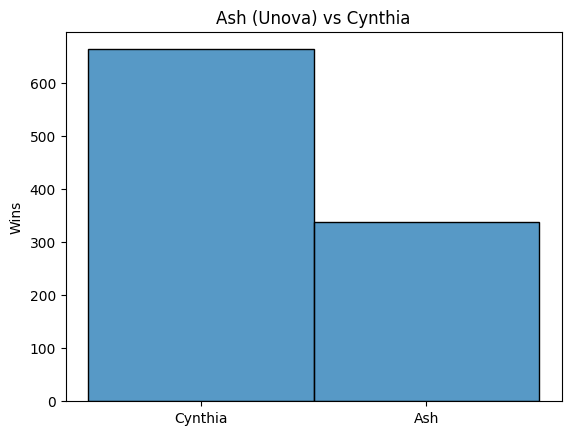

In [31]:
trainersBattle(
    ash_team=ash_unova.id.values,
    opponent_team=[442, 407, 350, 448, 468, 445],
    title='Ash (Unova) vs Cynthia',
    opponent_name='Cynthia')

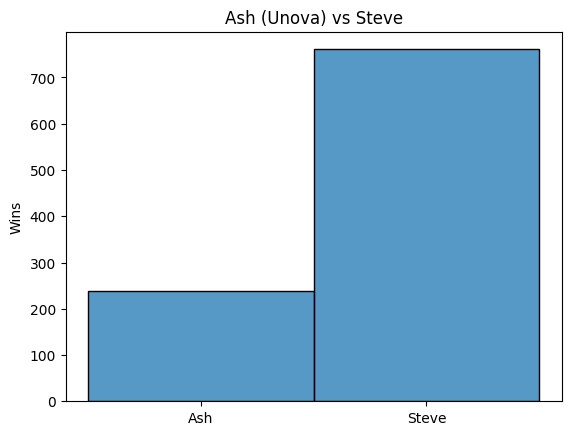

In [32]:
trainersBattle(
    ash_team=ash_unova.id.values,
    opponent_team=hoenn_champ['id'].values,
    title='Ash (Unova) vs Steve',
    opponent_name='Steve')

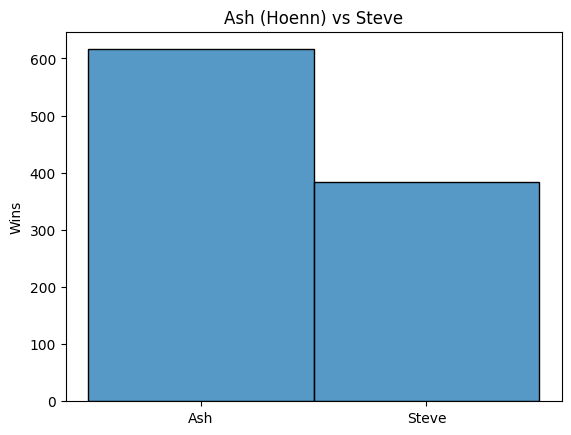

In [33]:
trainersBattle(
    ash_team=ash_hoenn.id.values,
    opponent_team=hoenn_champ['id'].values,
    title='Ash (Hoenn) vs Steve',
    opponent_name='Steve')

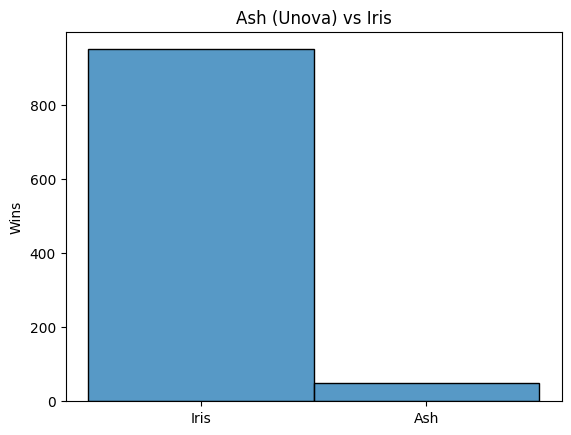

In [34]:
trainersBattle(
    ash_team=ash_unova.id.values,
    opponent_team=[635, 621, 567, 306, 131, 612],
    title='Ash (Unova) vs Iris',
    opponent_name='Iris')